# Import

In [1]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive/')

# %cd "/content/drive/MyDrive/Colab Notebooks/CONSEGNA_GENERATIVE/GAN"
%cd "/content/drive/MyDrive/CONSEGNA_GENERATIVE/GAN/"
files.view(".")

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1olta3FTiRnWH8S4R-XchpMkN0ZoyY9u4/CONSEGNA_GENERATIVE/GAN


<IPython.core.display.Javascript object>

In [2]:
import torch

import os
import re

from GAN_model import Generator
from GAN_training import show_generated_all, show_generated_specific
from GAN_training import LATENT_SIZE, COND_REPRESENTATION_SIZE, NUM_CLASSES, EXTENSION, MODEL_NAME, FOLDER_MODEL

# Search for last model in the folder

In [3]:
DEVICE= 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE = {DEVICE}')

DEVICE = cuda


In [4]:
max_number= 0
pattern= re.compile(fr'{MODEL_NAME}_(\d+).{EXTENSION}')
for file_name in os.listdir(FOLDER_MODEL):
    match= pattern.fullmatch(file_name)
    if match:
        num= int(match.group(1))
        if num > max_number:
            max_number= num
MODEL_EPOCH= max_number
print(f"Using epoch {MODEL_EPOCH}")

Using epoch 530


# Loading model & optimizer

In [5]:
generator= Generator(LATENT_SIZE, NUM_CLASSES, COND_REPRESENTATION_SIZE, device=DEVICE)
generator= generator.to(device=DEVICE)

In [6]:
if MODEL_EPOCH != 0:
    file= f"{MODEL_NAME}_{MODEL_EPOCH}.{EXTENSION}"
    file= os.path.join(FOLDER_MODEL, file)

    state= torch.load(file, map_location=DEVICE)

    generator.load_state_dict(state['model_generator'])

    print(f"Loaded from <{file}>")

#state= torch.load('./model_weights/Model_530.pth', map_location=DEVICE)

#generator.load_state_dict(state['model_generator'])
generator.eval()
generator.to(device=DEVICE)

Loaded from </content/drive/.shortcut-targets-by-id/1olta3FTiRnWH8S4R-XchpMkN0ZoyY9u4/CONSEGNA_GENERATIVE/GAN/model_weights/Model_530.pth>


Generator(
  (block_4_4): BlockDoubleSize(
    (net): Sequential(
      (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (block_8_8): BlockDoubleSize(
    (net): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (block_16_16): BlockDoubleSize(
    (net): Sequential(
      (0): ConvTranspose2d(256, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (condition_layer): ConditionMPL(
    (network): Sequential(
      (0): Linear(in_features=3, out_features=32, bias=True)
      (1): LeakyReLU(negative_slope=0.2, inplace=True)


# Show samples

The conditions are set to be in the order
- With or without eyeglasses
- Male/Female $\rightarrow$ True for male, False for female
- With or without beard

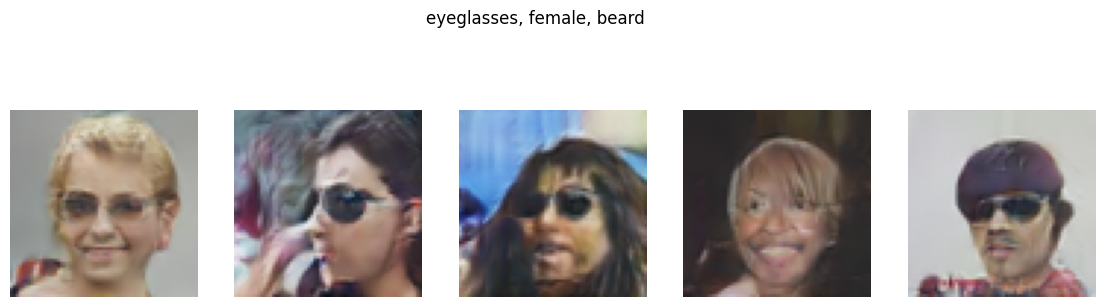

In [7]:
boolean_values= [True, False, True]

show_generated_specific(generator, boolean_values, num_examples=5)

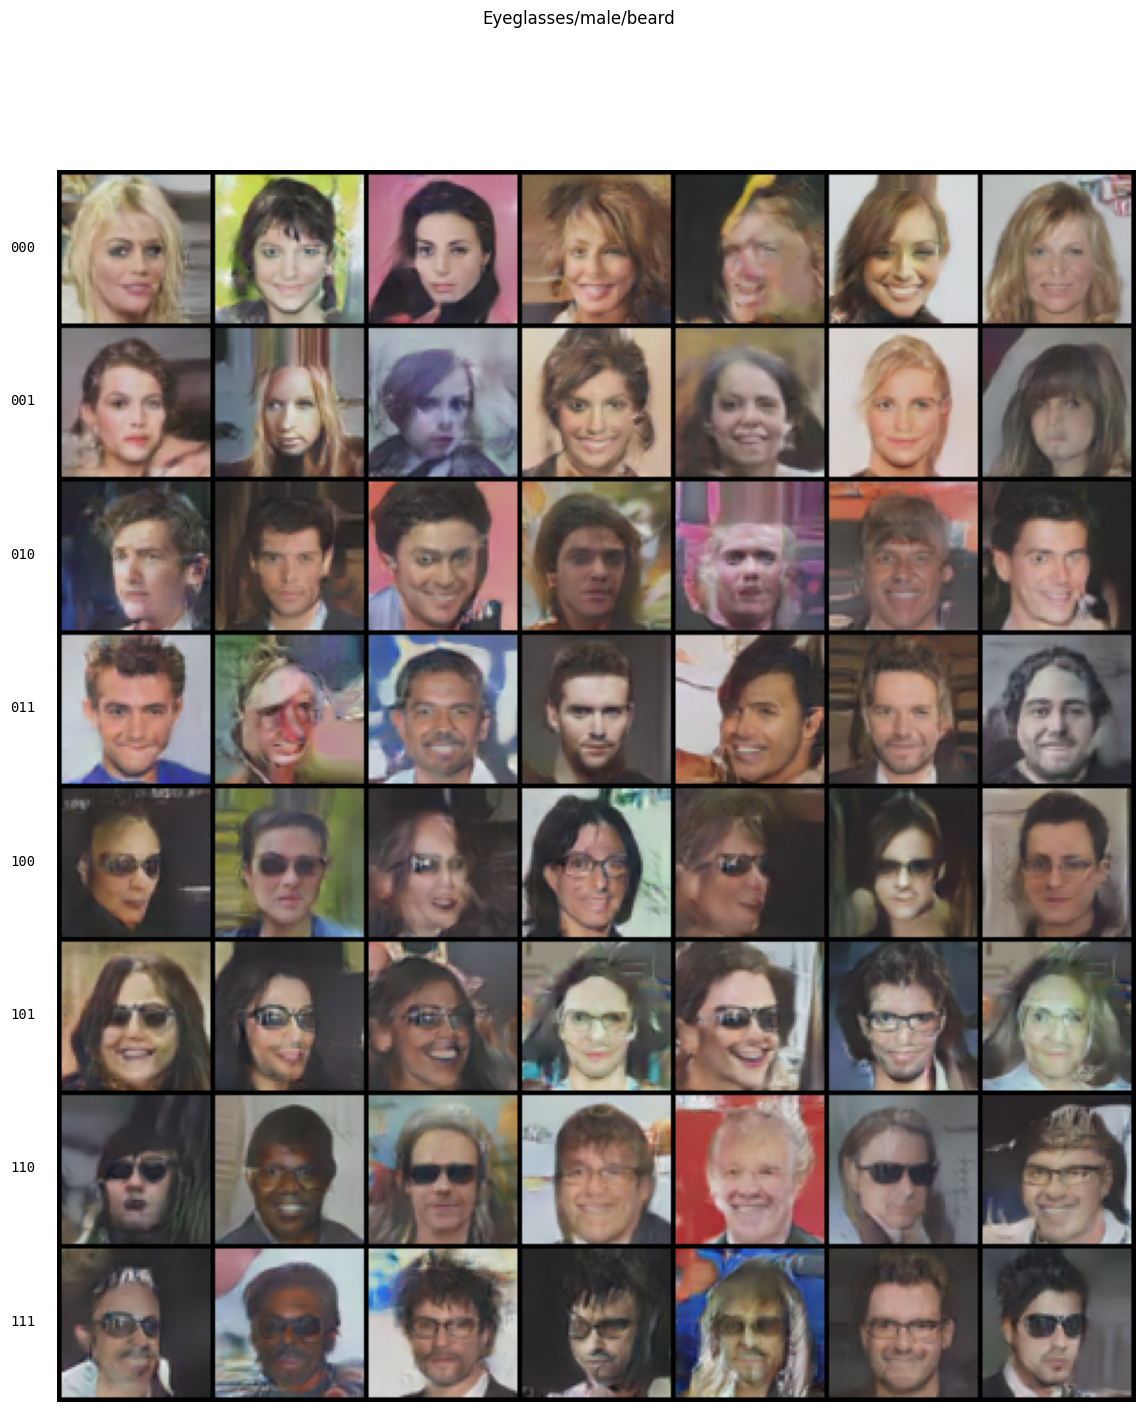

In [8]:
show_generated_all(generator, num_samples=7)